<a href="https://colab.research.google.com/github/madduvatsalya/Task-3_BharatIntern_Number_Regcognition/blob/main/Task3_BharatIntern_Number_Recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Number** **Recognition**

MNIST stands for the "Modified National Institute of Standards and Technology" database. It is a well-known dataset used in the field of machine learning and computer vision. The dataset contains a large collection of grayscale images of handwritten digits from 0 to 9.

The MNIST dataset is widely used as a benchmark in the machine learning community, particularly for testing and evaluating algorithms related to image recognition and classification. Each image in the dataset is a 28x28-pixel square, and the images are labeled with the corresponding digit they represent.

In [2]:
 # Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [4]:
data = pd.read_csv("/content/drive/MyDrive/trainDigit.csv")
test = pd.read_csv("/content/drive/MyDrive/testDigit.csv")
submission = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")
digits = data.drop("label", axis = 1)

## Ploting function

In [5]:
def plot_number(data, index, prediction = False):

    number = data.iloc[index].values.reshape(28, 28)

    plt.figure(figsize = (3, 3))

    sns.heatmap(number, cmap = 'Greys', cbar = False)

    if prediction:

        plt.title(f"Model prediction: {prediction}")

    plt.plot();

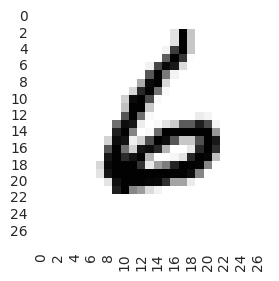

In [6]:
plot_number(digits, 109)

## Scaling data

In [8]:
def scale(label, images):

    images = images / 255.

    return pd.concat([label, images], axis = 1)

In [9]:
data = scale(label = data['label'],
             images = data.drop('label', axis = 1))

## Create validation data

In [10]:
from sklearn.model_selection import train_test_split

y = data['label']
X = data.drop('label', axis = 1)


train, validation, train_target, validation_target = train_test_split(
    X, y, test_size = 0.1, random_state = 42)

In [11]:
data = pd.concat([train_target, train], axis = 1)
validation = pd.concat([validation_target, validation], axis = 1)

## Neural Network Outline

In [12]:
INPUT_SIZE = 784
OUTPUT_SIZE = 10
HIDDEN_LAYER = 200

model = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (28, 28, 1)), # input layer

    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 1st hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 2nd hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 3rd hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 4th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 5th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 6th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 7th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 8th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 9th hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER, activation = 'relu'), # 10th hidden layer


    tf.keras.layers.Dense(OUTPUT_SIZE, activation = 'softmax') # output layer
])

model.compile(optimizer = "RMSprop",
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [13]:
EARLY_STOP = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

## Training NN

In [14]:
X = data.drop("label", axis = 1).values.reshape(-1,28,28,1)
y = data["label"].values

validation_X = validation.drop("label", axis = 1).values.reshape(-1,28,28,1)
validation_y = validation["label"].values


In [15]:
BATCH_SIZE = 128

augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False)

augmentation.fit(X)
training_data = augmentation.flow(X, y, batch_size = BATCH_SIZE)

In [16]:
EPOCHS = 50
EPOCH_STEP = X.shape[0] // BATCH_SIZE
VALIDATION_STEP = validation_X.shape[0] // BATCH_SIZE

model.fit(training_data, epochs = EPOCHS,
          callbacks = [EARLY_STOP],
          steps_per_epoch = EPOCH_STEP,
          validation_data = (validation_X, validation_y),
          validation_steps = VALIDATION_STEP,
          verbose = 1)

Epoch 1/50
295/295 [==============================] - 34s 107ms/step - loss: 1.1671 - accuracy: 0.5901 - val_loss: 0.3912 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 2/50
295/295 [==============================] - 23s 79ms/step - loss: 0.4213 - accuracy: 0.8737 - val_loss: 0.5203 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 3/50
295/295 [==============================] - 20s 68ms/step - loss: 0.2961 - accuracy: 0.9161 - val_loss: 0.2288 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 4/50
295/295 [==============================] - 23s 77ms/step - loss: 0.2427 - accuracy: 0.9306 - val_loss: 0.1546 - val_accuracy: 0.9581 - lr: 0.0010
Epoch 5/50
295/295 [==============================] - 22s 72ms/step - loss: 0.2109 - accuracy: 0.9397 - val_loss: 0.1708 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 6/50
295/295 [==============================] - 18s 62ms/step - loss: 0.1914 - accuracy: 0.9443 - val_loss: 0.1280 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 7/50
295/295 [==============================] - 20s

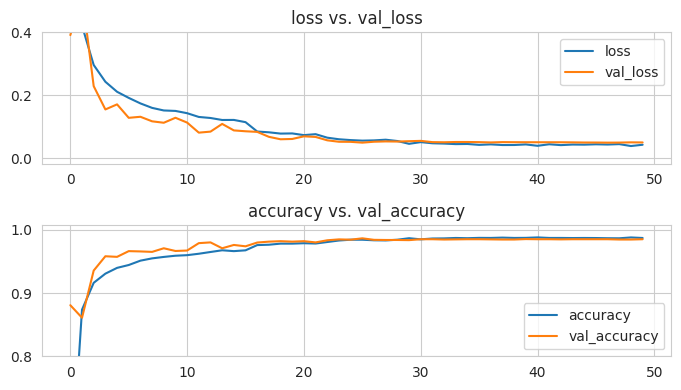

In [17]:
History = pd.DataFrame(model.history.history)

fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (7, 4))

History[['loss', 'val_loss']].plot(ax = ax1)
ax1.set_title('loss vs. val_loss')
ax1.set_ylim(top = 0.4)

History[['accuracy', 'val_accuracy']].plot(ax = ax2)
ax2.set_title('accuracy vs. val_accuracy')
ax2.set_ylim(0.8)

plt.tight_layout();

## Test the model

In [18]:
test_loss, test_accuracy = model.evaluate(x = validation_X, y = validation_y)

132/132 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9850


In [19]:
print(f'Test loss {round(test_loss, 2)}. Test accuracy: {round(test_accuracy * 100, 2)}%')

Test loss 0.05. Test accuracy: 98.5%


Predicting

In [20]:
predictions = np.argmax(model.predict(validation_X), axis = 1)

132/132 [==============================] - 0s 3ms/step


In [21]:
Preds = pd.DataFrame(
    {"Real Y" : validation_y, "Predicted Y" : predictions}
)

Preds['Correct'] = Preds['Real Y'] == Preds['Predicted Y']

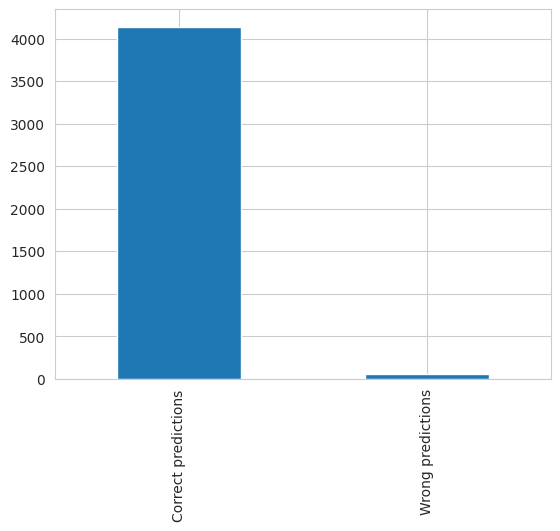

In [22]:
Preds['Correct'].map({True:"Correct predictions",
                      False:"Wrong predictions"}).value_counts().plot(kind = 'bar');

In [23]:
Preds['Correct'].map({True:"Correct predictions",
                      False:"Wrong predictions"}).value_counts().to_frame()

,Correct
Correct predictions,4137
Wrong predictions,63


In [ ]:
for prediction in Preds[Preds['Correct'] == False].index:

    plot_number(data = validation.drop("label", axis = 1),
                index = prediction,
                prediction = Preds.iloc[prediction]['Predicted Y']);

## Creating submision

In [ ]:
submission_predictions = np.argmax(model.predict(test.values.reshape(-1,28,28,1)), axis = 1)
submission_predictions

In [ ]:
submission["Label"] = submission_predictions

In [ ]:
submission

In [ ]:
plot_number(test, 0, '2')

In [ ]:
submission.to_csv('submission.csv', index = False)